# XGBoost Classifier

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00
time: 285 µs (started: 2023-12-30 14:41:31 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 23.1 s (started: 2023-12-30 14:41:31 +00:00)


In [ ]:
datasets=[]
for i in range(0,56):
  df=pd.read_csv(f'/content/drive/MyDrive/CSE_4554_MachineLearning/datasets/dataset{i}.csv')
  datasets.append(df)

time: 51.8 s (started: 2023-12-30 14:41:54 +00:00)


In [ ]:
for i in range(len(datasets)):
  datasets[i]=datasets[i].drop(['filename','Unnamed: 0'],axis=1)

time: 204 ms (started: 2023-12-30 14:42:46 +00:00)


In [ ]:
models=[]
for i in range(len(datasets)):
  models.append(make_pipeline(StandardScaler(), XGBClassifier()))

time: 946 µs (started: 2023-12-30 14:42:46 +00:00)


In [ ]:
X_train=[]
y_train=[]
X_val=[]
y_val=[]

time: 466 µs (started: 2023-12-30 14:42:46 +00:00)


In [ ]:
for i in range(len(datasets)):
  X=datasets[i].drop(['Bug Present'],axis=1).values
  y=datasets[i]['Bug Present'].values
  x_tr1,x_te1,y_tr1,y_te1=train_test_split(X,y,test_size=0.2,random_state=42)
  X_train.append(x_tr1)
  y_train.append(y_tr1)
  X_val.append(x_te1)
  y_val.append(y_te1)

time: 927 ms (started: 2023-12-30 14:42:46 +00:00)


In [ ]:
progress=0
for i in range(len(datasets)):
  models[i].fit(X_train[i],y_train[i])
  progress+=1
  print("Progress: ",progress/len(datasets)*100)

Progress:  1.7857142857142856
Progress:  3.571428571428571
Progress:  5.357142857142857
Progress:  7.142857142857142
Progress:  8.928571428571429
Progress:  10.714285714285714
Progress:  12.5
Progress:  14.285714285714285
Progress:  16.071428571428573
Progress:  17.857142857142858
Progress:  19.642857142857142
Progress:  21.428571428571427
Progress:  23.214285714285715
Progress:  25.0
Progress:  26.785714285714285
Progress:  28.57142857142857
Progress:  30.357142857142854
Progress:  32.142857142857146
Progress:  33.92857142857143
Progress:  35.714285714285715
Progress:  37.5
Progress:  39.285714285714285
Progress:  41.07142857142857
Progress:  42.857142857142854
Progress:  44.642857142857146
Progress:  46.42857142857143
Progress:  48.214285714285715
Progress:  50.0
Progress:  51.78571428571429
Progress:  53.57142857142857
Progress:  55.35714285714286
Progress:  57.14285714285714
Progress:  58.92857142857143
Progress:  60.71428571428571
Progress:  62.5
Progress:  64.28571428571429
Progr

# Performance Metrics

In [ ]:
y_Pred=[]
for i in range(len(datasets)):
  y_Pred.append(models[i].predict(X_val[i]))

time: 1.87 s (started: 2023-12-30 14:43:31 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score

time: 409 µs (started: 2023-12-30 14:43:32 +00:00)


In [ ]:
accuracy=[]
for i in range(len(datasets)):
  accuracy.append(accuracy_score(y_Pred[i],y_val[i]))
print("Accuracy on Validation Set: ",sum(accuracy)/len(datasets)*100,"%")

Accuracy on Validation Set:  73.8001549657404 %
time: 73.5 ms (started: 2023-12-30 14:43:32 +00:00)


In [ ]:
test_set=pd.read_csv(f'/content/drive/MyDrive/CSE_4554_MachineLearning/datasets/dataset56.csv')
test_set=test_set.drop(['filename','Unnamed: 0'],axis=1)
X_test,y_test=test_set.drop(['Bug Present'],axis=1).values,test_set['Bug Present'].values
y_test_pred=[]
for i in range(len(datasets)):
  y_pred=models[i].predict(X_test)
  y_test_pred.append(y_pred)




time: 6.4 s (started: 2023-12-30 14:43:33 +00:00)


In [ ]:
result = []
y_test_pred=np.array(y_test_pred)
for column in y_test_pred.T:
    most_common = np.bincount(column).argmax()
    result.append(most_common)

result = np.array(result)

time: 154 ms (started: 2023-12-30 14:43:39 +00:00)


In [ ]:
result

array([0, 0, 0, ..., 1, 1, 1])

time: 1.93 ms (started: 2023-12-30 14:43:39 +00:00)


In [ ]:
print("Accuracy on Test Set: ", accuracy_score(result,y_test)*100)

Accuracy on Test Set:  75.28398475450265
time: 7.85 ms (started: 2023-12-30 14:43:39 +00:00)


In [ ]:
from sklearn.metrics import roc_curve,auc

time: 336 µs (started: 2023-12-30 14:43:39 +00:00)


In [ ]:
fpr,tpr, _ = roc_curve(y_test, result)
roc_auc = auc(fpr,tpr)

time: 4.49 ms (started: 2023-12-30 14:43:39 +00:00)


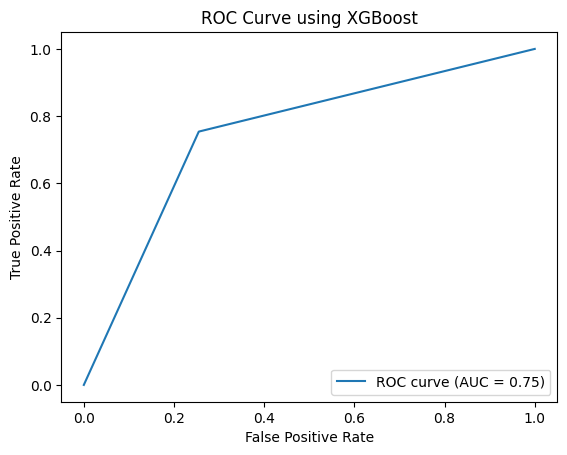

time: 295 ms (started: 2023-12-30 14:43:39 +00:00)


In [ ]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using XGBoost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 165 ms (started: 2023-12-30 14:43:39 +00:00)


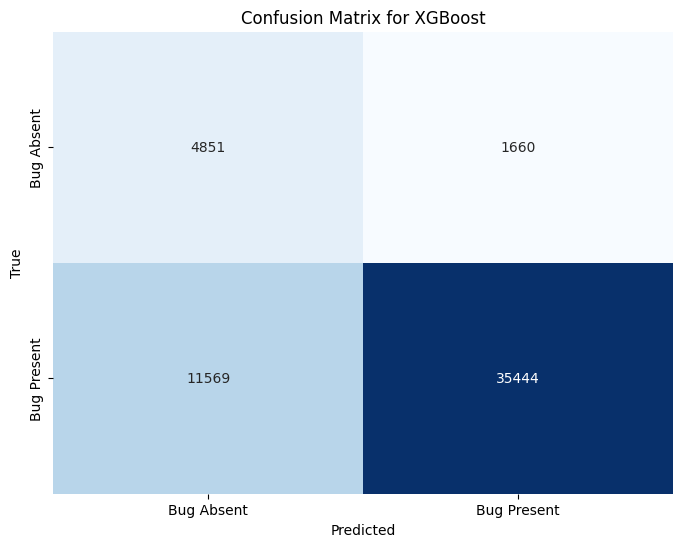

time: 127 ms (started: 2023-12-30 14:43:40 +00:00)


In [ ]:
confusion=confusion_matrix(y_test,result)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Bug Absent', 'Bug Present'], yticklabels=['Bug Absent', 'Bug Present'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')

plt.show()

In [ ]:
!pip install joblib


time: 4.02 s (started: 2023-12-30 14:43:40 +00:00)


In [ ]:
import joblib
joblib.dump(models, '/content/drive/MyDrive/CSE_4554_MachineLearning/xgboost_model.joblib')

['/content/drive/MyDrive/CSE_4554_MachineLearning/xgboost_model.joblib']

time: 702 ms (started: 2023-12-30 14:43:44 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {}
dtree = XGBClassifier()
grid_search=[]
epochs=len(datasets)
for i in range(epochs):
    print(f'{i}th model: ')
    grid_search_tmp = GridSearchCV(dtree, param_grid, scoring='accuracy', cv=10)
    stdSclr=StandardScaler()
    stdSclr.fit(X_train[i])
    grid_search_tmp.fit(stdSclr.transform(X_train[i]), y_train[i])
    grid_search.append(grid_search_tmp)
    print("Progress=",(i/epochs)*100)



0th model: 
Progress= 0.0
1th model: 
Progress= 1.7857142857142856
2th model: 
Progress= 3.571428571428571
3th model: 
Progress= 5.357142857142857
4th model: 
Progress= 7.142857142857142
5th model: 
Progress= 8.928571428571429
6th model: 
Progress= 10.714285714285714
7th model: 
Progress= 12.5
8th model: 
Progress= 14.285714285714285
9th model: 
Progress= 16.071428571428573
10th model: 
Progress= 17.857142857142858
11th model: 
Progress= 19.642857142857142
12th model: 
Progress= 21.428571428571427
13th model: 
Progress= 23.214285714285715
14th model: 
Progress= 25.0
15th model: 
Progress= 26.785714285714285
16th model: 
Progress= 28.57142857142857
17th model: 
Progress= 30.357142857142854
18th model: 
Progress= 32.142857142857146
19th model: 
Progress= 33.92857142857143
20th model: 
Progress= 35.714285714285715
21th model: 
Progress= 37.5
22th model: 
Progress= 39.285714285714285
23th model: 
Progress= 41.07142857142857
24th model: 
Progress= 42.857142857142854
25th model: 
Progress= 4

In [ ]:
val_accuracy=[]
for i in range(epochs):
    val_accuracy.append(grid_search[i].score(StandardScaler().fit(X_val[i]).transform(X_val[i]), y_val[i]))
print(sum(val_accuracy)/epochs*100)

test_accuracy=[]
for i in range(epochs):
    test_accuracy.append(grid_search[i].score(StandardScaler().fit(X_test).transform(X_test), y_test))
print(sum(test_accuracy)/epochs*100)

70.67501253399368
58.680184856993364
time: 8.69 s (started: 2023-12-30 14:57:15 +00:00)
